In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [2]:
path = r"D:\KTC UKESM1-0-LL\UKESM_KTC_dataset_2020s_SSP5-8.5.nc"
KTC = xr.open_dataset(path)

In [3]:
BWh = KTC['BWh'].values
BWk = KTC['BWk'].values
BSh = KTC['BSh'].values
BSk = KTC['BSk'].values
Ar = KTC['Ar'].values
Aw = KTC['Aw'].values
Cf = KTC['Cf'].values
Cm = KTC['Cm'].values
DC = KTC['DC'].values
DO = KTC['DO'].values
E = KTC['E'].values
Ft = KTC['Ft'].values
Fi = KTC['Fi'].values

In [4]:
climate_datasets = {
    "BWh": {"dataset": BWh, "variable": "BWh"},  
    "BWk": {"dataset": BWk, "variable": "BWk"},
    "BSh": {"dataset": BSh, "variable": "BSh"},
    "BSk": {"dataset": BSk, "variable": "BSk"},
    "Ar": {"dataset": Ar, "variable": "Ar"},
    "Aw": {"dataset": Aw, "variable": "Aw"},
    "Cf": {"dataset": Cf, "variable": "Cf"},
    "Cm": {"dataset": Cm, "variable": "Cm"},
    "DC": {"dataset": DC, "variable": "DC"},
    "DO": {"dataset": DO, "variable": "DO"},
    "E": {"dataset": E, "variable": "E"},
    "Ft": {"dataset": Ft, "variable": "Ft"},
    "Fi": {"dataset": Fi, "variable": "Fi"},
}

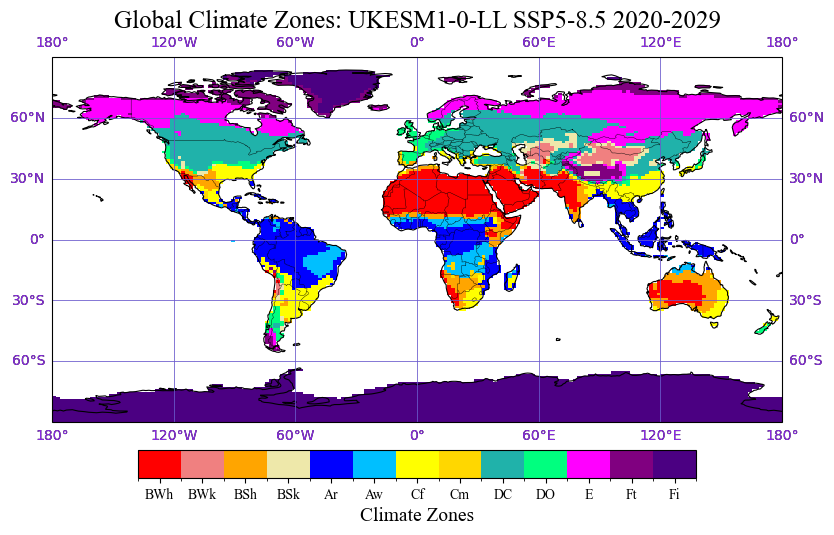

In [92]:
zone_ids = {"BWh": 1, "BWk": 2, "BSh": 3, "BSk": 4, "Ar": 5, "Aw":6, "Cf":7, "Cm":8, "DC":9, "DO":10, "E":11, "Ft":12, "Fi":13}
zone_colors = {"BWh": "red", "BWk": "lightcoral", "BSh": "orange", "BSk": "palegoldenrod", "Ar": "blue", "Aw":"deepskyblue", "Cf":"yellow",
              "Cm":"gold", "DO":"springgreen", "DC":"lightseagreen","E":"magenta", "Ft":"purple", "Fi":"indigo"}

lat_array = np.array(KTC["lat"])  # Convert list to NumPy array
lon_array = np.array(KTC["lon"])

combined_grid = np.full_like(lat_array[:, None] * lon_array[None, :], np.nan, dtype=float)

#this is filling the combined grid so it represents all of the data points
for zone, info in climate_datasets.items():
    ds = info["dataset"]
    variable = info["variable"]
    data = ds
    mask = ~np.isnan(data) & (data > 0)  
    combined_grid = np.where(mask & np.isnan(combined_grid), zone_ids[zone], combined_grid)

#creating custom colormap from color designations above
cmap = mcolors.ListedColormap([zone_colors[zone] for zone in zone_ids.keys()])
bounds = [0.5 + i for i in range(len(zone_ids) + 1)]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title("Global Climate Zones: UKESM1-0-LL SSP5-8.5 2020-2029", fontsize=18, fontname='Times New Roman')
lon, lat = np.meshgrid(KTC["lon"].values, KTC["lat"].values)
pcolormesh = ax.pcolormesh(lon, lat, combined_grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')
#adding a legend/key :)
handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", label=zone)
    for zone, color in zone_colors.items()
]
cbar = fig.colorbar(pcolormesh, ax=ax, orientation="horizontal", pad=0.06, shrink=0.6, ticks=list(zone_ids.values()))
cbar.set_label("Climate Zones", fontsize=14, fontname='Times New Roman')
cbar.set_ticks(list(zone_ids.values()))
cbar.set_ticklabels(list(zone_ids.keys()), fontname='Times New Roman')
ax.coastlines(linewidth=0.8)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='slateblue', linewidth = 0.4)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  color='slateblue', linewidth=0.4)
#lat and lon labels 
gl.xlabel_style = {"size": 10, "color": "blueviolet"}  #lon labels
gl.ylabel_style = {"size": 10, "color": "blueviolet"}  #lat labels
ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidth=0.3)
plt.savefig('/Users/jaybr/OneDrive/Desktop/RESEARCH/KTC_UKESM_SSP5-8.5_2020s.png', dpi=300, bbox_inches='tight') 
plt.show()
